#  SWMAL Opgave

## Dataanalyse

### Qa) Beskrivelse af datasæt til O4 projekt

I kurset er slutprojektet et bærende element, som I forventes at arbejde på igennem hele kurset
sideløbende med de forskellige undervisningsemner. 

I skal selv vælge et O4 projekt–det anbefales at I vælger en problemstilling, hvor der allerede er data til rådighed og en god beskrivelse af data, dataopsamlingsmetode og problemstilling.

I denne opgave skal I:

* a) Give en kort konceptmæssig projektbeskrivelse af Jeres ide til O4 projekt. 

* b) Beskrive jeres valgte datasæt med en kort forklaring af baggrund og hvor I har fået data fra.

* c) Beskrive data–dvs. hvilke features, antal samples, target værdier, evt. fejl/usikkerheder, etc.

* d) Forklare hvordan I ønsker at anvende datasættet – vil I fx. bruge det til at prædiktere noget
bestemt, lave en regression eller klassifikation, el.lign. 

I vil nok komme til at anvende data også på andre måder i løbet af undervisningen – men det behøver I ikke nævne. Og det er også ok, hvis I ender med at bruge data på en anden måde end planlagt her.

Omfang af beskrivelsen forventes at være 1-2 sider.


### Qb) Dataanalyse af eget datasæt

Lav data analyse på jeres egne data og projekt.

Det indebærer de sædvanlige elementer såsom plotte histogrammer, middelværdi/median/spredning, analysere for outliers/korrupte data, forslag til skalering af data og lignende former for analyse af data.

For nogle typer data (fx billed-data), hvor features ikke har en specifik betydning, er det mest
histogrammer og lignende, som giver mening – det er helt o.k. 


#### NOTE vdr. billeddatasæts

For billeddata fer hver pixel en feature, og alm. analyse beskrevet ovenfor giver ikke indsigt. Prøv i stedet for billeder at beskrive billedformater (JPEG, PNG osv. / RGB, HSV, gråtone, multispektral, etc.), størrelser af billeder, hvordan de er repræsenteret på disk (dirs osv.)

Giv også eksempler på billeder og evt. labels i billedesæt.

Histogrammer kan udføres på enkelte billeder, men kun i forbindelse med labelede områder---og bedst på billesæt med ens baggrunde.

Benytter i lyddata eller video gælder de samme begrænsinger som får billeder her.

### NOTE vdr. valg af datasæt til O4

I har frie hænder til at vælge O4 projekt og tilhørende datasæt og valg af datasæt og ide til O4 her er ikke endelig. 

Dvs. at i løbende kan modificere projektbeskrivelse og, evt. om nødvendigt, vælge et andet datasæt senere, hvis jeres nuværende valg viser sig umuligt (men er en dyr proces). 

Scope af O4 projekt bør også begrænses, så det passer til kurset og til den '_time-box_'ede aflevering.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Indlæs datasættet
data = pd.read_csv('Housing.csv')  # If the file is in the same directory as your script



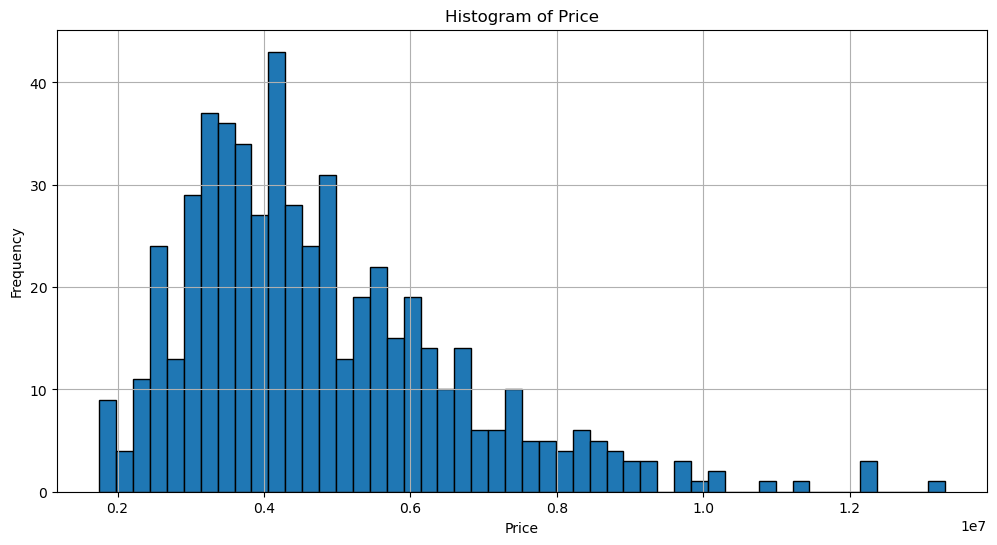

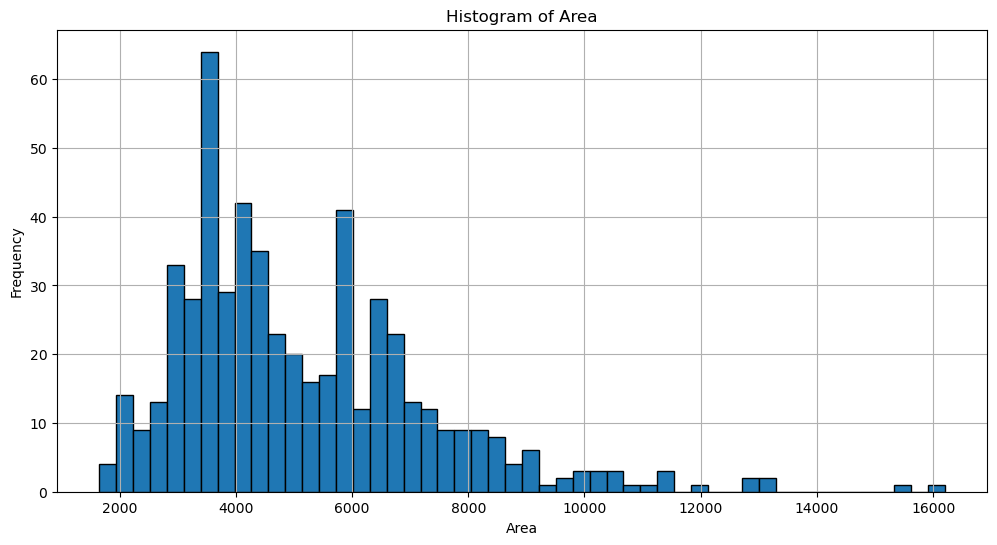

In [20]:
# Plot histogram for 'price' (boligpris) og 'area' (boligstørrelse)
def plot_histograms():
    plt.figure(figsize=(12, 6))
    data['price'].hist(bins=50, edgecolor='black')
    plt.title('Histogram of Price')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(12, 6))
    data['area'].hist(bins=50, edgecolor='black')
    plt.title('Histogram of Area')
    plt.xlabel('Area')
    plt.ylabel('Frequency')
    plt.show()

plot_histograms()


In [16]:
# Grundlæggende statistik (middelværdi, median, std. afvigelse)
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [22]:
# Beregn middelværdi, median og spredning
def basic_statistics():
    print(data[['price', 'area']].describe())

basic_statistics()


              price          area
count  5.450000e+02    545.000000
mean   4.766729e+06   5150.541284
std    1.870440e+06   2170.141023
min    1.750000e+06   1650.000000
25%    3.430000e+06   3600.000000
50%    4.340000e+06   4600.000000
75%    5.740000e+06   6360.000000
max    1.330000e+07  16200.000000


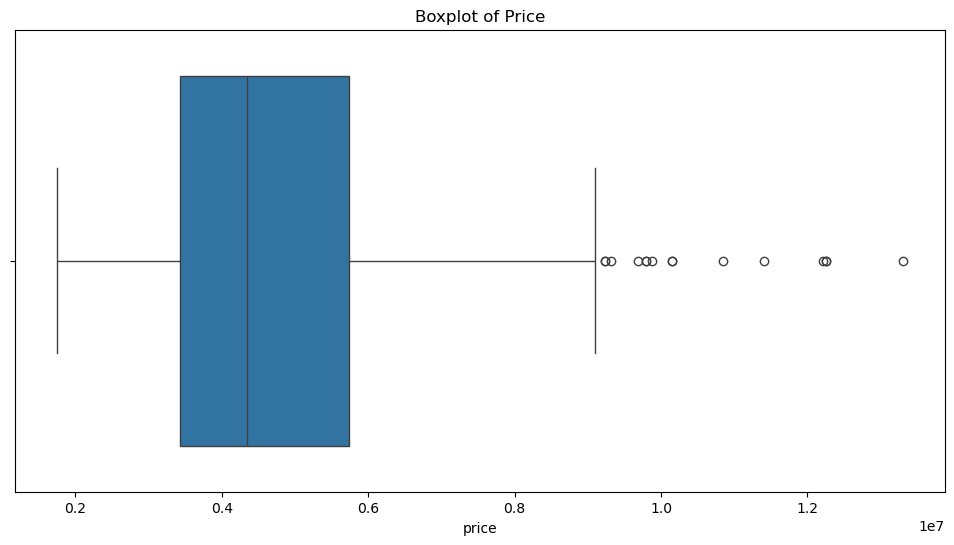

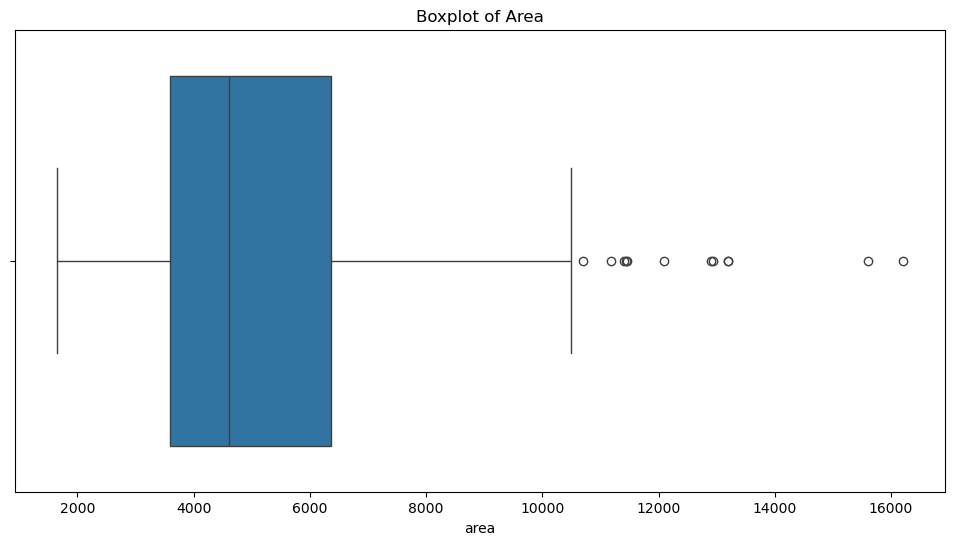

In [23]:
# Boxplot for at identificere outliers i 'price' og 'area'
def plot_boxplots():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data['price'])
    plt.title('Boxplot of Price')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data['area'])
    plt.title('Boxplot of Area')
    plt.show()

plot_boxplots()


       area  bedrooms
0  1.046726  1.403419
1  1.757010  1.403419
2  2.218232  0.047278
3  1.083624  1.403419
4  1.046726  1.403419


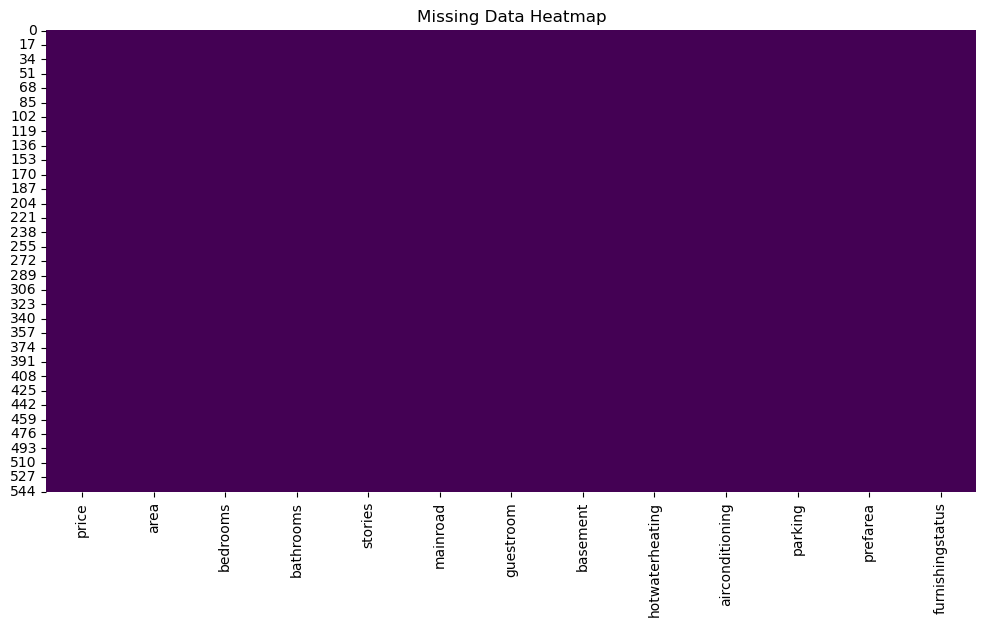

In [25]:
# Skalering af data
def scale_data():
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[['area', 'bedrooms']])  # Brug 'area' og 'bedrooms' som eksempler
    scaled_df = pd.DataFrame(scaled_data, columns=['area', 'bedrooms'])
    print(scaled_df.head())

scale_data()


# Visualisering af manglende værdier
def plot_missing_values():
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()

plot_missing_values()


REVISIONS||
:-|:-|
2021-08-17| CEF, moved from Word to Notebook.
2021-11-08| CEF, elaborated on image based data.
2022-01-25| CEF, update to F22 SWMAL.
2023-02-19| CEF, updated to F23 SWMAL.